# About Dataset
## Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

## Content
price price in US dollars 326--18,823

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

        ("cut_cat", OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]), ['cut']),
        ("color_cat", OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']]), ['color']),
        ("clarity_cat", OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), ['clarity']),

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
X_train = pd.read_csv("https://raw.githubusercontent.com/Khalidallam222/SHAI-Khalid-Allam/main/Task%207%3A%20end%20to%20end%20ML%20Project/train.csv")
X_sub = pd.read_csv("https://raw.githubusercontent.com/Khalidallam222/SHAI-Khalid-Allam/main/Task%207%3A%20end%20to%20end%20ML%20Project/test.csv")

In [120]:
X_train.drop('Id', axis=1, inplace=True)

In [107]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


# Utilities

In [108]:
def winsorize(df, feature_name, lower_bound=None, upper_bound=None):
  """
  Winsorizes outliers in a feature by replacing them with nearest non-outlier values.

  Args:
      df (pandas.DataFrame): The DataFrame containing the feature.
      feature_name (str): The name of the feature column.
      lower_bound (float, optional): The lower bound for outlier replacement. Defaults to None (calculated from IQR).
      upper_bound (float, optional): The upper bound for outlier replacement. Defaults to None (calculated from IQR).

  Returns:
      pandas.DataFrame: The DataFrame with outliers winsorized.
  """
  if lower_bound is None or upper_bound is None:
    Q1 = df[feature_name].quantile(0.25)
    Q3 = df[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR) if lower_bound is None else lower_bound
    upper_bound = Q3 + (1.5 * IQR) if upper_bound is None else upper_bound
  df.loc[df[feature_name] < lower_bound, feature_name] = lower_bound
  df.loc[df[feature_name] > upper_bound, feature_name] = upper_bound
  return df

# Winsorize outliers in the 'table' feature (assuming you want to use IQR for bounds)
# X_train_filtered = winsorize(X_train.copy(), 'table')

# Now 'X_train_filtered' contains your data with outliers in 'table' winsorized

# Alternatively, specify custom bounds (optional)
# lower_bound = ...  # Define a specific value for the lower bound
# upper_bound = ...  # Define a specific value for the upper bound
# X_train_filtered = winsorize(X_train.copy(), 'table', lower_bound, upper_bound)


In [121]:
import pandas as pd

def remove_outliers_iqr(df, feature_name, thresh=1.5):
  """
  Removes outliers from a feature using IQR (Interquartile Range).

  Args:
      df (pandas.DataFrame): The DataFrame containing the feature.
      feature_name (str): The name of the feature column.
      thresh (float, optional): The multiplier for IQR to define outlier threshold. Defaults to 1.5.

  Returns:
      pandas.DataFrame: The DataFrame with outliers removed.
  """
  Q1 = df[feature_name].quantile(0.25)
  Q3 = df[feature_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (thresh * IQR)
  upper_bound = Q3 + (thresh * IQR)
  return df[(df[feature_name] >= lower_bound) & (df[feature_name] <= upper_bound)]


In [110]:
from sklearn.preprocessing import StandardScaler

def scale_columns(df, columns):
  """
  Applies StandardScaler to specified columns in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing the features.
      columns (list): A list of column names to be scaled.

  Returns:
      pandas.DataFrame: The DataFrame with scaled columns.
      StandardScaler: The fitted StandardScaler object (optional).
  """
  scaler = StandardScaler()
  scaled_df = df.copy()
  scaled_df[columns] = scaler.fit_transform(df[columns])
  return scaled_df, scaler  # Optional to return the scaler object

# # Example usage
# df = pd.DataFrame({'col1': [1, 2, 3], 'col2': [10, 20, 30], 'col3': ['a', 'b', 'c']})
# scaled_df, scaler = scale_columns(df, ['col1', 'col2'])
# print(scaled_df)


# Correlation Matrix

In [111]:
X_train.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


As you can see there a strong correlation between price and carat, x, y, z

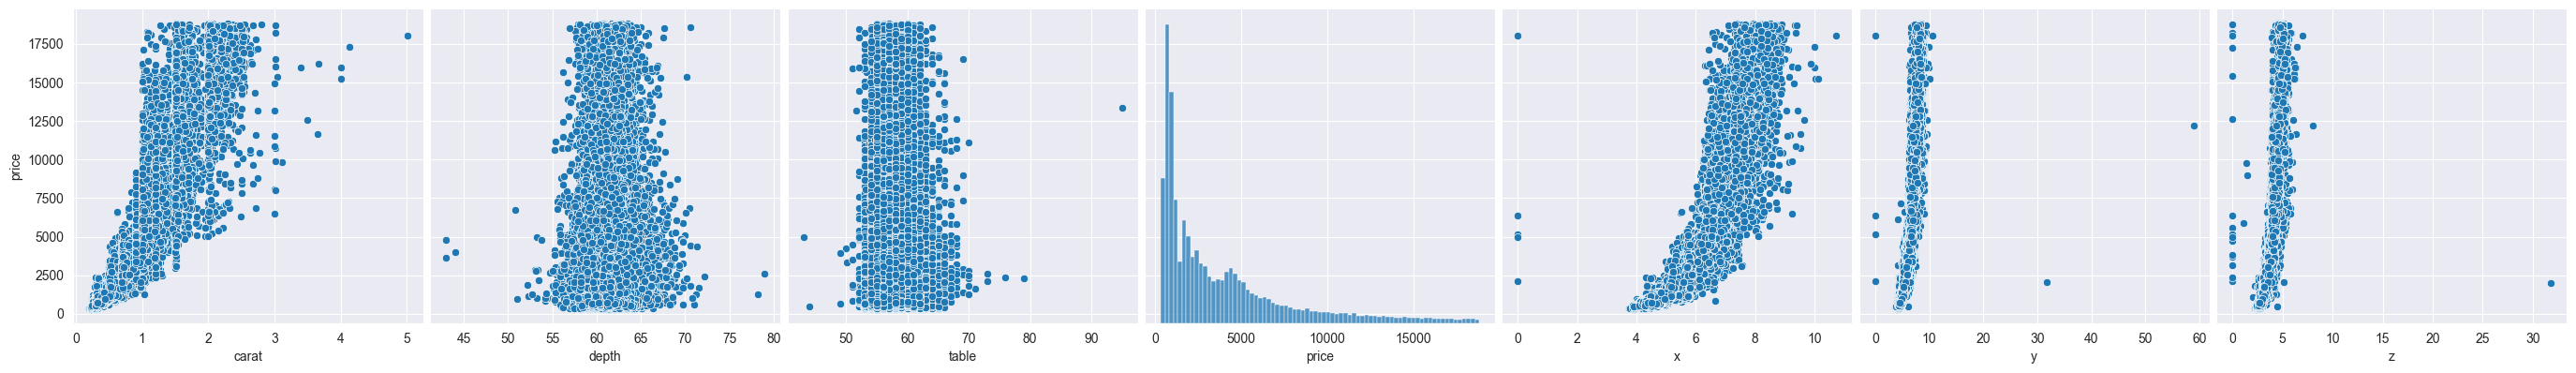

In [112]:
sns.pairplot(data=X_train, y_vars='price', diag_kind='hist', height=(4))

# Carat Feature

## some outliers
        ("cut_cat", OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]), ['cut']),
        ("color_cat", OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']]), ['color']),
        ("clarity_cat", OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), ['clarity']),

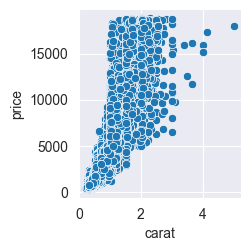

In [113]:
sns.pairplot(data=X_train, y_vars='price', x_vars='carat')

In [114]:
X_train[X_train['carat'] >= 3].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
39490,3.00,Very Good,H,I1,63.1,55.0,6512,9.23,9.10,5.77
23004,3.01,Premium,I,I1,62.7,58.0,8040,9.10,8.97,5.67
22788,3.00,Fair,H,I1,67.1,57.0,8044,8.93,8.84,5.97
20984,3.11,Fair,J,I1,65.9,57.0,9823,9.15,9.02,5.98
35076,3.01,Premium,F,I1,62.2,56.0,9925,9.24,9.13,5.73
8689,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31
9927,3.00,Good,I,I1,57.0,64.0,10863,9.38,9.31,5.33
26229,3.00,Good,E,I1,64.2,65.0,11548,9.08,8.96,5.79
16302,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
12566,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03


If you look at the previous data you will notice some unlogical data (look at the first two rows) 

Q1: 0.4 Q2: 0.7 Q3: 1.04


<Axes: ylabel='carat'>

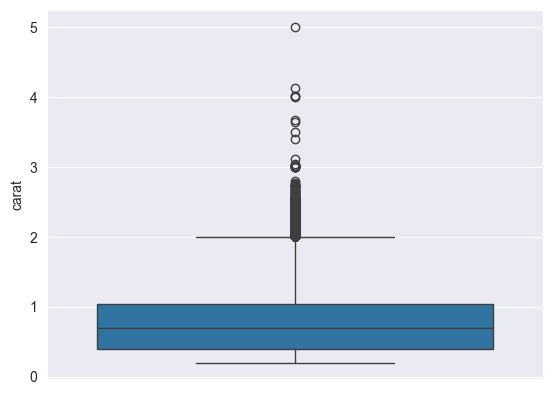

In [115]:
feature_name = 'carat'
Q1 = X_train[feature_name].quantile(0.25)
Q2 = X_train[feature_name].quantile(0.50)
Q3 = X_train[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train, y=feature_name)


In [116]:
X_train_filtered = winsorize(X_train.copy(), 'carat', lower_bound=0.4 ,upper_bound=4)

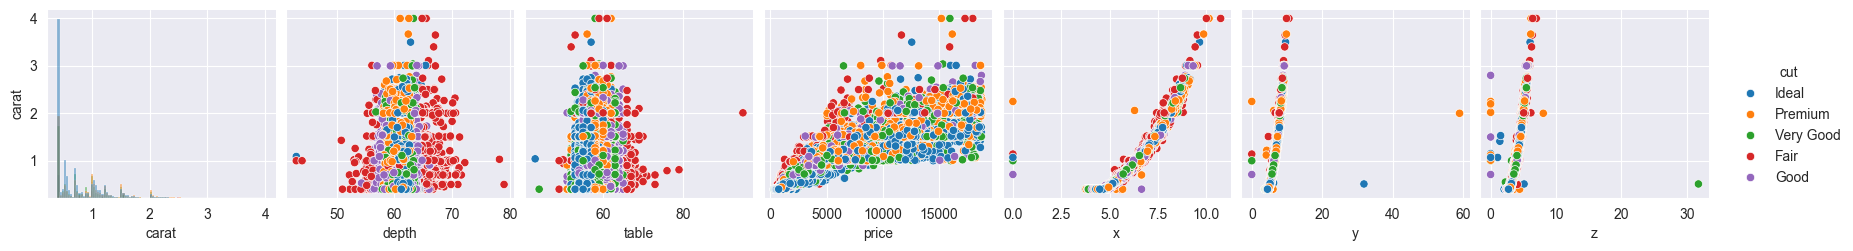

In [117]:
sns.pairplot(data=X_train_filtered, hue='cut', y_vars='carat', diag_kind='hist')

# Depth Feature

KeyboardInterrupt: 

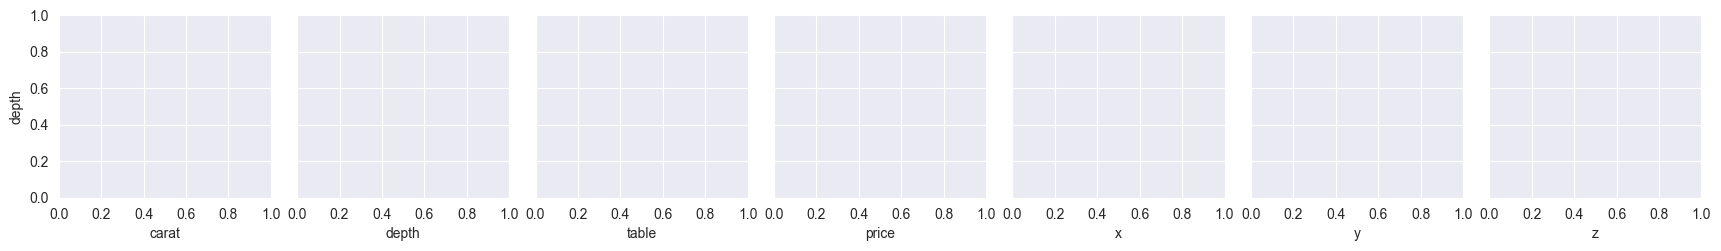

In [118]:
sns.pairplot(data=X_train, hue='cut', y_vars='depth', diag_kind='hist')

As you can see the depth column don't affect the price and have almost a zero correlation so we can delete this column 

In [ ]:
feature_name = 'depth'
Q1 = X_train[feature_name].quantile(0.25)
Q2 = X_train[feature_name].quantile(0.50)
Q3 = X_train[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train, y=feature_name)


In [ ]:
X_train_filtered = winsorize(X_train.copy(), 'depth', lower_bound=50 ,upper_bound=72)

In [ ]:
sns.pairplot(data=X_train_filtered, hue='cut', y_vars='depth', diag_kind='hist')

# Table Feature

In [ ]:
sns.pairplot(data=X_train, hue='cut', y_vars='table', diag_kind='hist')

the table feature doesn't affect the price and it depends on the cut feature so we can delete it

In [ ]:
feature_name = 'table'
Q1 = X_train[feature_name].quantile(0.25)
Q2 = X_train[feature_name].quantile(0.50)
Q3 = X_train[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train, y=feature_name)

In [ ]:
X_train_filtered = winsorize(X_train.copy(), 'table', upper_bound=80)

In [ ]:
sns.pairplot(data=X_train_filtered, hue='cut', y_vars='table', diag_kind='hist')

# X, Y, Z Features

## X Feature

In [ ]:
sns.pairplot(data=X_train, y_vars='price', x_vars='x')

In [ ]:
X_train[X_train['x'] < 3].sort_values(by='price')

You will have to remove zero x

In [ ]:
feature_name = 'x'
Q1 = X_train[feature_name].quantile(0.25)
Q2 = X_train[feature_name].quantile(0.50)
Q3 = X_train[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train, y=feature_name)

In [ ]:
X_train_filtered = winsorize(X_train.copy(), 'x', lower_bound=4)

In [ ]:
sns.pairplot(data=X_train_filtered, hue='cut', y_vars='x', diag_kind='hist')


## Y Feature

In [ ]:
sns.pairplot(data=X_train, y_vars='price', x_vars='y', height=5)

In [ ]:
X_train[(X_train['y'] < 0.5) | (X_train['y'] > 20)].sort_values(by='price')

Notice the y>20 or y<0.5 they are unlogical in prices

In [ ]:
feature_name = 'y'
Q1 = X_train[feature_name].quantile(0.25)
Q2 = X_train[feature_name].quantile(0.50)
Q3 = X_train[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train, y=feature_name)

In [ ]:
X_train_filtered = winsorize(X_train.copy(), 'y', lower_bound=4)

In [ ]:
sns.pairplot(data=X_train_filtered, hue='cut', y_vars='y', diag_kind='hist')

## Z Feature

In [ ]:
sns.pairplot(data=X_train, y_vars='price', x_vars='z', height=5)

In [ ]:
X_train[(X_train['z'] < 1.55) | (X_train['z'] > 6)].sort_values(by='price')

In [ ]:
feature_name = 'z'
Q1 = X_train[feature_name].quantile(0.25)
Q2 = X_train[feature_name].quantile(0.50)
Q3 = X_train[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train, y=feature_name)

In [ ]:
X_train_filtered = winsorize(X_train.copy(), 'z', lower_bound=2)

In [ ]:
sns.pairplot(data=X_train_filtered, hue='cut', y_vars='z', diag_kind='hist')

# Extra Volume Feature with caping outliers

In [ ]:
# X_train_filtered = winsorize(X_train.copy(), 'x', lower_bound=4)
# X_train_filtered = winsorize(X_train_filtered.copy(), 'y', lower_bound=4)
# X_train_filtered = winsorize(X_train_filtered.copy(), 'z')
# X_train_filtered['volume'] = X_train_filtered['x'] * X_train_filtered['y'] * X_train_filtered['z']
# # X_train_filtered["volume"] = X_train_filtered["volume"].apply(np.log1p)
# X_train_filtered = winsorize(X_train_filtered, 'carat', lower_bound=0.4 ,upper_bound=4)
# X_train_filtered = winsorize(X_train_filtered, 'depth', lower_bound=50 ,upper_bound=72)
# X_train_filtered = winsorize(X_train_filtered, 'table', upper_bound=80)

# sns.pairplot(data=X_train_filtered, hue='cut', diag_kind='hist')

# Dropping outliers


In [122]:
X_train_filtered = X_train.copy()
X_train_filtered = X_train_filtered[X_train_filtered['x'] >= 3 ]
X_train_filtered = X_train_filtered[(X_train_filtered['y'] >= 0.5) & (X_train_filtered['y'] <= 20)]
X_train_filtered = X_train_filtered[(X_train_filtered['z'] >= 1.55) & (X_train_filtered['z'] <= 6)]
X_train_filtered = X_train_filtered[X_train_filtered['carat'] < 3]

# sns.pairplot(data=X_train_filtered, hue='cut', diag_kind='hist')


# removing Outliers automatically
# X_train_filtered = X_train.copy()
# X_train_filtered = X_train.select_dtypes(include=np.number).copy()
# from sklearn.ensemble import IsolationForest
# isolation_forest = IsolationForest(random_state=42)
# outlier_pred = isolation_forest.fit_predict(X_train_filtered)
# X_train_filtered = X_train_filtered.iloc[outlier_pred == 1]
# sns.pairplot(data=X_train_filtered, diag_kind='hist')

In [ ]:
X_train_filtered.info()

# Pipeline

In [123]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    )
# Function to drop 'table' and 'depth' columns
def drop_table_depth(X):
    return X.drop(X.columns ,axis=1)

def drop_feature_names_out(function_transformer, feature_names_in):
    return []  # feature names out

preprocessing = ColumnTransformer([
        ("drop_table_depth", FunctionTransformer(drop_table_depth, feature_names_out=drop_feature_names_out), ['table', 'depth']),
        ("cut_cat", OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]), ['cut']),
        ("color_cat", OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']]), ['color']),
        ("clarity_cat", OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), ['clarity']),
    ],
    remainder=StandardScaler()
    # remainder='passthrough'
) 

# Model

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_filtered.drop(['price'], axis=1), X_train_filtered['price'], test_size=0.2, random_state=42)       

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor    
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor

clf=make_pipeline(preprocessing, RandomForestRegressor(max_depth=60, max_features=4, n_estimators=960))
# clf=make_pipeline(preprocessing, XGBRFRegressor())

# clf_rmses = -cross_val_score(clf, X_train, y_train,
#                                 scoring="neg_root_mean_squared_error", cv=3)

# pd.Series(clf_rmses).describe()

In [126]:
clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('drop_table_depth',
                                                  FunctionTransformer(feature_names_out=<function drop_feature_names_out at 0x7a7cc88f9a20>,
                                                                      func=<function drop_table_depth at 0x7a7cc88f9f30>),
                                                  ['table', 'depth']),
                                                 ('cut_cat',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal']]),
                                                  ['cut']),
                                                 ('color_cat',
                                                  OrdinalEncoder(categories=[['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D']]),
                                                  ['color']),
                                                 ('clarity_cat',
                                                  OrdinalEncoder(categories=[['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']]),
                                                  ['clarity'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=60, max_features=4,
                                       n_estimators=960))])

In [127]:
from sklearn.metrics import r2_score, root_mean_squared_error
y_pred = clf.predict(X_train)
print(r2_score(y_train, y_pred), root_mean_squared_error(y_train, y_pred))

0.9974855894029037 199.65627422362252


In [128]:
y_pred = clf.predict(X_test)
print(r2_score(y_test, y_pred), root_mean_squared_error(y_test, y_pred))

0.9809661538655785 544.5543676361438


In [129]:
feature_importances = clf['randomforestregressor'].feature_importances_
sorted(zip(feature_importances,
           clf["columntransformer"].get_feature_names_out()),
           reverse=True)

[(0.3845286392158592, 'remainder__carat'),
 (0.3529526462190384, 'remainder__y'),
 (0.12734447160107712, 'remainder__x'),
 (0.06345900092357117, 'clarity_cat__clarity'),
 (0.03601974433742865, 'remainder__z'),
 (0.03270641901382422, 'color_cat__color'),
 (0.0029890786892012174, 'cut_cat__cut')]

# Feature selection on importance and train again

In [140]:
from sklearn.feature_selection import SelectFromModel

# Create a SelectFromModel instance
selector = SelectFromModel(RandomForestRegressor(max_depth=30, max_features=4, n_estimators=500), threshold=0.03)  # Features with importance greater than the mean importance will be selected

clf=make_pipeline(preprocessing, selector, RandomForestRegressor())

# Fit the selector to the data
clf.fit(X_train, y_train)

# # Transform the data to select the most important features
# X_selected = clf.transform(X_train)

y_pred = clf.predict(X_train)
print(r2_score(y_train, y_pred), root_mean_squared_error(y_train, y_pred))
y_pred = clf.predict(X_test)
print(r2_score(y_test, y_pred), root_mean_squared_error(y_test, y_pred))

0.9969134448411162 221.2085375571521
0.9791360973485799 570.1324265416279


In [138]:
clf.fit(X_train_filtered.drop(['price'], axis=1), X_train_filtered['price'])

# # Transform the data to select the most important features
# X_selected = clf.transform(X_train)

y_pred = clf.predict(X_train_filtered.drop(['price'], axis=1))

print(r2_score(X_train_filtered['price'], y_pred), root_mean_squared_error(X_train_filtered['price'], y_pred))

0.9969406369842444 219.85267018260822


In [139]:
clf_rmses = -cross_val_score(clf, X_train_filtered.drop(['price'], axis=1), X_train_filtered['price'],
                                scoring="neg_root_mean_squared_error", cv=3)

pd.Series(clf_rmses).describe()

count      3.000000
mean     567.457771
std        8.050078
min      561.096118
25%      562.932618
50%      564.769118
75%      570.638597
max      576.508077
dtype: float64

# Fine Tune

In [74]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint


# Define the parameter grid for RandomizedSearchCV
param_distribs = {
    'randomforest__n_estimators': randint(100, 1000),
    'randomforest__max_features': randint(1, 11),
    'randomforest__max_depth': randint(5, 50),
    'randomforest__min_samples_split': randint(2, 20),
    'randomforest__min_samples_leaf': randint(1, 10),
    'randomforest__bootstrap': [True, False]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    clf, param_distributions=param_distribs, n_iter=50,
    scoring="neg_root_mean_squared_error", cv=5, random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate on the training set
y_train_pred = best_model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Train R2: {train_r2}, Train RMSE: {train_rmse}")

# Evaluate on the test set
y_test_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test R2: {test_r2}, Test RMSE: {test_rmse}")

/home/khalid/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
75 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/khalid/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/khalid/.local/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/khalid/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params

Best parameters: {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 0.6912977877077271, 'randomforestregressor__n_estimators': 825}


TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'